In [3]:
from qutip import destroy, ket2dm, wigner, squeeze, fock, fock_dm, tensor, qeye, isket
import strawberryfields as sf
from strawberryfields.ops import *
import scipy.optimize
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors, colorbar, cm
import time

In [4]:
def plot_wigner(state, fig=None, ax=None):
    if fig is None or ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(4,4))
    
    scale = np.sqrt(2)
    xvec = np.linspace(-5*scale,5*scale,100)

    W = state.wigner(mode=0, xvec=xvec, pvec=xvec)
    
    wlim = abs(W).max()
    ax.contourf(xvec/scale, xvec/scale, W, 60, norm=mpl.colors.Normalize(-wlim,wlim), cmap=mpl.cm.get_cmap('RdBu'))
    ax.set_xlabel('q', fontsize=16)
    ax.set_ylabel('p', fontsize=16)
    #ax.set_title()
    fig.tight_layout
    
    return fig, ax

(<Figure size 288x288 with 1 Axes>, <AxesSubplot:xlabel='q', ylabel='p'>)

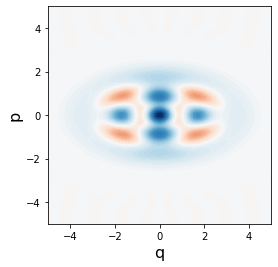

In [14]:
dim = 30
U = np.array([[0.80583318+0.28916261j, -0.39974178+0.30753938j, 0.018732-0.11087391j],
              [0.27461744+0.42791259j,   0.82125822-0.0388464j, -0.25593352+0.j     ],
              [0.0908724 +0.01536737j,  0.26222798+0.02980632j, 0.96013235+0.j      ]])
prog = sf.Program(3)
with prog.context as q:
    Squeezed(-0.42745798) | q[0]
    Squeezed(-1.02696604) | q[1]
    Squeezed(0.63579302) | q[2]
    Interferometer(U, tol=1e-8) | (q[0], q[1], q[2])
    MeasureFock(select=[2,2]) | (q[1], q[2])

eng = sf.Engine('fock', backend_options={"cutoff_dim": dim})
state = eng.run(prog).state

plot_wigner(state)

In [3]:
def circuit(params):
    prog = sf.Program(3)
    with prog.context as q:
        Squeezed(params[0])            | q[0]
        Squeezed(params[1])            | q[1]
        Squeezed(params[2])            | q[2]
        
        Rgate(params[3])               | q[0]
        BSgate(theta=params[4], phi=0) | (q[0], q[1])
        Rgate(params[5])               | q[1]
        BSgate(theta=params[6], phi=0) | (q[1], q[2])
        Rgate(params[7])               | q[0]
        BSgate(theta=params[8], phi=0) | (q[0], q[1])
        Rgate(params[9])               | q[0]
        #Rgate(params[10])              | q[1]
        #Rgate(params[11])              | q[2]
        
        MeasureFock(select=[2,2])       | (q[1], q[2])
        
    eng = sf.Engine("fock", backend_options={"cutoff_dim": dim})
    state = eng.run(prog).state
    return state

initial parameters [ 0.16372962 -0.62542609  0.06644389 -0.31843705  0.19806411  0.4958032
  0.2998555  -0.84598    -0.32926381  0.69210697]
learnt parameters [-0.42745798 -1.02696604  0.63579302  0.05434444  0.335972    0.11317992
  0.28332106 -1.59582484 -0.41396465  1.73816449]


(<Figure size 288x288 with 1 Axes>, <AxesSubplot:xlabel='q', ylabel='p'>)

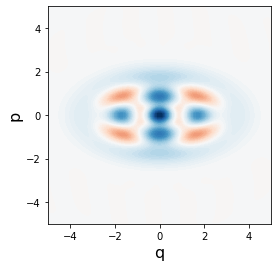

In [4]:
dim = 20

params_history = np.load('strawberryfields_scipyminimize_gkp_0.9999718064984098_params.npy')
print('initial parameters', params_history[0])
print('learnt parameters', params_history[-1])

#initial_state = circuit(params_history[0])
learnt_state = circuit(params_history[-1])
#plot_wigner(initial_state)
plot_wigner(learnt_state)

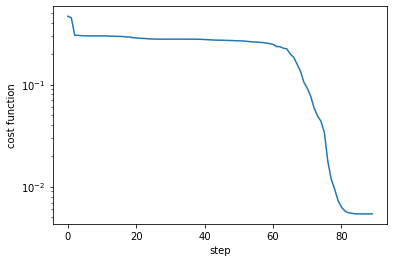

In [7]:
cost_history = np.load('strawberryfields_scipyminimize_gkp_0.0.9999718064984098_cost.npy')
plt.plot(np.linspace(0, len(cost_history)-1, len(cost_history)), cost_history)
plt.xlabel('step')
plt.ylabel('cost function')
plt.yscale('log')
plt.show()